In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel('/content/drive/MyDrive/python/AIML/courseWork01/Mutual_Funds_Sht_list20.xlsx')
data

,Date,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
0,2020-04-17,124.39,132.46,125.93,143.85,101.57,118.35,16.6991,112.35,2.5766,...,107.95,1.201,1076.21,114.32,116.33,1.5334,146.37,29.97,1.779,107.9620
1,2020-04-24,124.39,132.46,125.93,143.85,101.57,118.35,16.8738,112.35,2.5808,...,107.95,1.201,1076.21,114.32,117.05,1.5345,146.42,29.32,1.764,107.9444
2,2020-05-01,125.93,132.19,126.97,144.87,102.16,116.12,16.6996,112.33,2.5811,...,107.58,1.203,1087.01,114.97,116.80,1.5310,146.87,30.00,1.804,108.6293
3,2020-05-08,125.93,132.19,126.97,144.87,102.16,116.12,16.8233,112.33,2.5871,...,107.58,1.204,1087.01,114.97,116.74,1.5408,147.04,29.84,1.819,108.6894
4,2020-05-15,125.93,132.19,126.97,144.87,102.16,116.12,16.9853,112.33,2.5927,...,107.58,1.212,1087.01,115.36,117.38,1.5415,146.93,29.95,1.793,108.4216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-01-14,182.56,175.93,166.95,188.58,131.17,148.59,22.6119,116.57,2.9513,...,110.04,1.347,1200.45,135.89,138.56,1.7106,153.63,39.40,2.517,129.6124
92,2022-01-21,182.56,175.93,166.95,188.58,131.17,148.59,22.5163,116.57,2.9610,...,110.04,1.347,1200.45,134.86,138.40,1.6913,153.02,38.81,2.543,128.4681
93,2022-01-28,182.56,175.93,166.95,188.58,131.17,148.59,22.5308,116.57,2.9577,...,110.04,1.346,1200.45,134.86,138.23,1.6838,152.52,37.83,2.464,126.8428
94,2022-02-04,182.56,175.93,166.95,188.58,131.17,148.59,22.6486,116.57,2.9558,...,109.91,1.345,1192.33,134.86,137.75,1.6901,152.72,38.56,2.475,127.9764


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0    2020-04-17
1    2020-04-24
2    2020-05-01
3    2020-05-08
4    2020-05-15
        ...    
91   2022-01-14
92   2022-01-21
93   2022-01-28
94   2022-02-04
95   2022-02-11
Name: Date, Length: 96, dtype: datetime64[ns]

In [5]:
data.set_index('Date', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


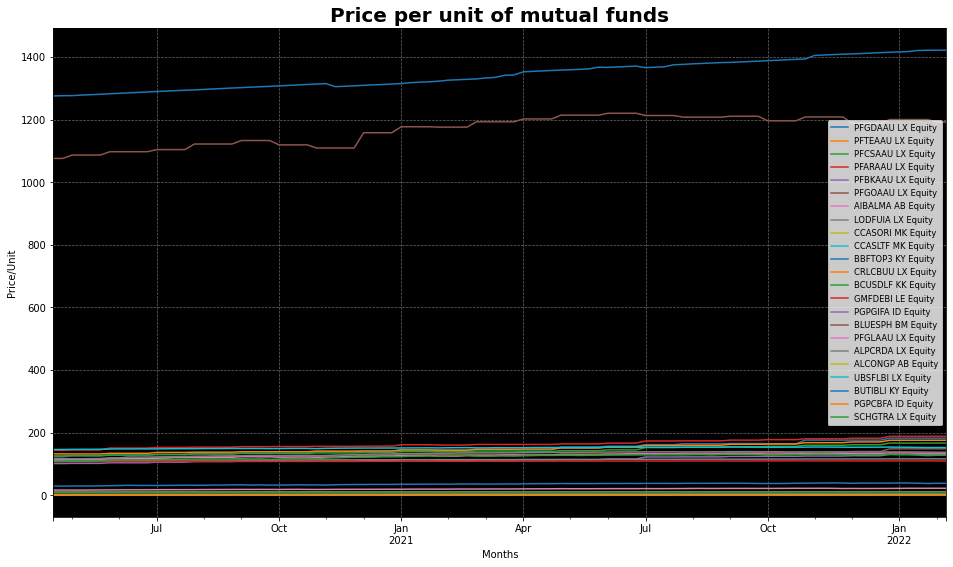

In [6]:
data.plot(figsize=(16,9))

# Formating Graph
ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# labeling the graph neatly
plt.xlabel('Months')
plt.ylabel('Price/Unit')
plt.title('Price per unit of mutual funds',  fontsize= 20, fontweight='bold')
plt.legend(loc='best', fontsize='small')

## Calculating returns, standerd diviation and mean

In [7]:
# Resampling weekly data to monthly

data = data.resample('M').mean()
td = 12

In [8]:
# Calculating Log returns

returns= data.pct_change().apply(lambda x: np.log(1+x))
returns

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,0.016140,0.001102,0.011433,0.015575,0.009505,-0.015137,0.013082,0.000303,0.005229,0.004837,...,-0.003155,0.010272,0.011930,0.010581,0.008278,0.005001,0.005579,0.017289,0.008935,0.013979
2020-06-30,0.015199,0.012470,0.012731,0.033331,0.014715,0.015391,0.035894,0.001920,0.012300,0.011837,...,0.001115,0.023095,0.007741,0.014257,0.033637,0.006585,0.007080,0.047918,0.037123,0.031220
2020-07-31,0.020513,0.021835,0.014788,0.014393,0.022482,0.030252,0.025234,0.001331,0.012526,0.013097,...,0.002003,0.001006,0.009384,0.022352,0.016003,0.010471,0.003676,0.010047,0.116212,0.016266
2020-08-31,0.017554,0.004769,0.008881,0.004427,0.016254,0.014515,0.028408,0.000355,0.008150,0.006743,...,0.001333,0.004615,0.012764,0.012694,0.016380,0.015936,0.004837,0.026490,0.036590,0.014759
2020-09-30,0.011929,0.009240,0.015474,0.010598,0.016140,0.020230,0.014117,-0.000355,0.003912,0.005686,...,0.000093,-0.003610,0.009931,0.014031,0.011175,-0.000110,-0.000100,0.009326,0.000578,-0.002652
2020-10-31,0.005838,0.004116,0.000775,0.003619,-0.006242,-0.001410,0.004478,0.003064,0.005789,0.004301,...,0.001331,0.003330,-0.014130,-0.009108,0.001835,-0.001002,0.000933,0.002487,0.021909,0.008103
2020-11-30,0.025318,0.011215,0.008721,0.002405,-0.003448,-0.004704,0.010852,0.002332,0.010712,0.010515,...,0.000886,0.012616,-0.007156,0.004670,0.011218,0.012268,0.005850,0.020269,0.057298,0.027156
2020-12-31,0.015822,0.001132,0.011233,0.003763,0.015766,0.021899,0.014030,0.001763,0.004597,0.003904,...,0.002029,0.016669,0.042871,0.017633,0.022384,0.010265,0.003382,0.029582,0.020613,0.017915


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


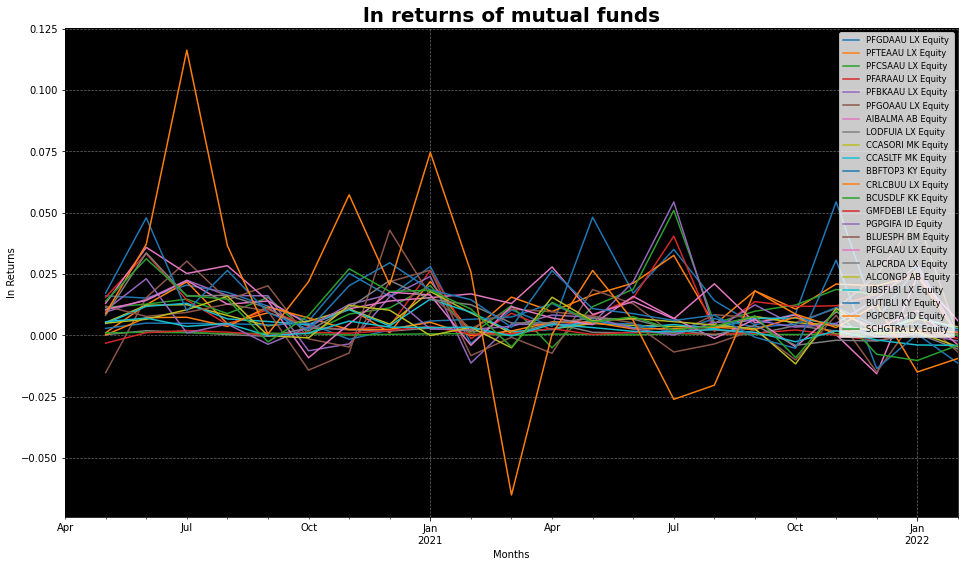

In [9]:
# Plotting the Log returns

returns.plot(figsize=(16,9))

# Formating Graph
ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# labeling the graph neatly
plt.xlabel('Months')
plt.ylabel('ln Returns')
plt.title('ln returns of mutual funds',  fontsize= 20, fontweight='bold')
plt.legend(loc='best', fontsize='small')

In [10]:
# Calculating cumilitive returns

cumiReturns = returns.sum()
cumiReturns

PFGDAAU LX Equity    0.383657
PFTEAAU LX Equity    0.283805
PFCSAAU LX Equity    0.281968
PFARAAU LX Equity    0.270751
PFBKAAU LX Equity    0.255746
PFGOAAU LX Equity    0.227544
AIBALMA AB Equity    0.297871
LODFUIA LX Equity    0.036873
CCASORI MK Equity    0.139001
CCASLTF MK Equity    0.136010
BBFTOP3 KY Equity    0.108108
CRLCBUU LX Equity    0.086427
BCUSDLF KK Equity    0.012463
GMFDEBI LE Equity    0.017994
PGPGIFA ID Equity    0.112868
BLUESPH BM Equity    0.102464
PFGLAAU LX Equity    0.165236
ALPCRDA LX Equity    0.165448
ALCONGP AB Equity    0.095580
UBSFLBI LX Equity    0.041610
BUTIBLI KY Equity    0.260845
PGPCBFA ID Equity    0.339653
SCHGTRA LX Equity    0.171009
dtype: float64

In [11]:
# Calculating annualised returns

meanReturns = returns.mean()*td
meanReturns

PFGDAAU LX Equity    0.209268
PFTEAAU LX Equity    0.154803
PFCSAAU LX Equity    0.153801
PFARAAU LX Equity    0.147682
PFBKAAU LX Equity    0.139498
PFGOAAU LX Equity    0.124115
AIBALMA AB Equity    0.162475
LODFUIA LX Equity    0.020113
CCASORI MK Equity    0.075819
CCASLTF MK Equity    0.074187
BBFTOP3 KY Equity    0.058968
CRLCBUU LX Equity    0.047142
BCUSDLF KK Equity    0.006798
GMFDEBI LE Equity    0.009815
PGPGIFA ID Equity    0.061564
BLUESPH BM Equity    0.055889
PFGLAAU LX Equity    0.090129
ALPCRDA LX Equity    0.090244
ALCONGP AB Equity    0.052134
UBSFLBI LX Equity    0.022696
BUTIBLI KY Equity    0.142279
PGPCBFA ID Equity    0.185265
SCHGTRA LX Equity    0.093278
dtype: float64

In [12]:
# calculating annualised standard deviation or risk (σ)

stdvReturns = returns.std()*(td)**(0.5)
stdvReturns

PFGDAAU LX Equity    0.050321
PFTEAAU LX Equity    0.031564
PFCSAAU LX Equity    0.039112
PFARAAU LX Equity    0.038328
PFBKAAU LX Equity    0.048561
PFGOAAU LX Equity    0.051551
AIBALMA AB Equity    0.038458
LODFUIA LX Equity    0.004596
CCASORI MK Equity    0.014155
CCASLTF MK Equity    0.012955
BBFTOP3 KY Equity    0.010702
CRLCBUU LX Equity    0.010067
BCUSDLF KK Equity    0.001154
GMFDEBI LE Equity    0.005276
PGPGIFA ID Equity    0.021470
BLUESPH BM Equity    0.043417
PFGLAAU LX Equity    0.028582
ALPCRDA LX Equity    0.032349
ALCONGP AB Equity    0.023559
UBSFLBI LX Equity    0.010582
BUTIBLI KY Equity    0.050889
PGPCBFA ID Equity    0.127395
SCHGTRA LX Equity    0.038893
dtype: float64

In [13]:
# Calculating sharpe ratio

rfr=0.0148    #risk free rate as 1.48% from bloomberg

sharpeReturns = (meanReturns-rfr)/stdvReturns
sharpeReturns

PFGDAAU LX Equity    3.864564
PFTEAAU LX Equity    4.435544
PFCSAAU LX Equity    3.553898
PFARAAU LX Equity    3.467022
PFBKAAU LX Equity    2.567873
PFGOAAU LX Equity    2.120542
AIBALMA AB Equity    3.839888
LODFUIA LX Equity    1.155903
CCASORI MK Equity    4.310694
CCASLTF MK Equity    4.583950
BBFTOP3 KY Equity    4.127154
CRLCBUU LX Equity    3.212520
BCUSDLF KK Equity   -6.931538
GMFDEBI LE Equity   -0.944850
PGPGIFA ID Equity    2.178086
BLUESPH BM Equity    0.946386
PFGLAAU LX Equity    2.635504
ALPCRDA LX Equity    2.332193
ALCONGP AB Equity    1.584753
UBSFLBI LX Equity    0.746222
BUTIBLI KY Equity    2.505051
PGPCBFA ID Equity    1.338083
SCHGTRA LX Equity    2.017804
dtype: float64

In [14]:
# Creating a dataframe of ln returns, cumulative returns, risk, and sharpe ratio

perfTable = pd.concat([sharpeReturns, cumiReturns ,meanReturns, stdvReturns], axis=1)
perfTable.columns = ['Sharpe','Cumulative return', 'Returns','Volatility']
perfTable

,Sharpe,Cumulative return,Returns,Volatility
PFGDAAU LX Equity,3.864564,0.383657,0.209268,0.050321
PFTEAAU LX Equity,4.435544,0.283805,0.154803,0.031564
PFCSAAU LX Equity,3.553898,0.281968,0.153801,0.039112
PFARAAU LX Equity,3.467022,0.270751,0.147682,0.038328
PFBKAAU LX Equity,2.567873,0.255746,0.139498,0.048561
PFGOAAU LX Equity,2.120542,0.227544,0.124115,0.051551
AIBALMA AB Equity,3.839888,0.297871,0.162475,0.038458
LODFUIA LX Equity,1.155903,0.036873,0.020113,0.004596
CCASORI MK Equity,4.310694,0.139001,0.075819,0.014155
CCASLTF MK Equity,4.583950,0.136010,0.074187,0.012955


## Calculating the correlation and covariance using pandas

In [15]:
# Computing Covariance matrix

covReturns = returns.cov()
covReturns

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
PFGDAAU LX Equity,2.110143e-04,7.267112e-05,9.212401e-05,6.090299e-05,0.000075,7.191678e-05,-0.000012,9.961163e-08,7.046449e-06,9.991656e-06,...,2.168133e-06,7.312737e-06,3.534606e-05,4.026623e-05,8.367718e-07,3.214948e-05,7.800406e-06,0.000066,0.000059,2.282822e-05
PFTEAAU LX Equity,7.267112e-05,8.302321e-05,8.087977e-05,7.422208e-05,0.000091,6.301381e-05,-0.000017,6.847913e-07,4.559172e-06,6.320650e-06,...,3.660675e-06,-1.479944e-05,-1.501180e-05,2.811309e-05,-1.196659e-05,1.517833e-06,-4.920507e-06,-0.000019,0.000011,-1.743358e-05
PFCSAAU LX Equity,9.212401e-05,8.087977e-05,1.274804e-04,1.036365e-04,0.000139,6.124105e-05,-0.000021,-2.212316e-06,1.308355e-06,4.170949e-06,...,1.134769e-06,-1.455177e-05,-4.380338e-07,3.415178e-05,-4.363635e-06,-2.896059e-06,-5.559920e-06,-0.000013,-0.000051,-2.405352e-05
PFARAAU LX Equity,6.090299e-05,7.422208e-05,1.036365e-04,1.224168e-04,0.000126,6.138155e-05,0.000008,-6.423397e-08,1.229939e-05,1.275002e-05,...,1.921757e-06,3.259713e-06,-2.052081e-06,3.653516e-05,1.908649e-05,-6.556429e-06,-4.166502e-07,0.000015,0.000005,1.496098e-06
PFBKAAU LX Equity,7.453193e-05,9.054563e-05,1.392005e-04,1.264364e-04,0.000197,9.868712e-05,0.000014,-2.401172e-06,5.375067e-06,5.914997e-06,...,4.323467e-06,-1.439191e-05,3.187345e-05,6.494950e-05,1.601031e-05,1.196410e-05,-3.375917e-06,-0.000001,-0.000004,-1.466643e-05
PFGOAAU LX Equity,7.191678e-05,6.301381e-05,6.124105e-05,6.138155e-05,0.000099,2.214552e-04,0.000020,-1.868557e-06,1.624174e-05,1.691807e-05,...,6.748589e-06,-1.435553e-05,5.388434e-05,5.929614e-05,2.352788e-05,7.507931e-07,-1.287001e-05,-0.000011,0.000150,-2.905660e-05
AIBALMA AB Equity,-1.243653e-05,-1.718183e-05,-2.086275e-05,8.128906e-06,0.000014,1.989461e-05,0.000123,3.015566e-06,1.850245e-05,1.776586e-05,...,8.000470e-06,2.765315e-05,6.156233e-05,3.740661e-05,6.519600e-05,2.876582e-05,1.644398e-05,0.000098,0.000088,5.747555e-05
LODFUIA LX Equity,9.961163e-08,6.847913e-07,-2.212316e-06,-6.423397e-08,-0.000002,-1.868557e-06,0.000003,1.760261e-06,8.882532e-07,7.750465e-07,...,1.234875e-06,1.856225e-06,-1.994627e-06,-2.928118e-06,-9.035952e-07,6.679212e-07,5.281891e-07,0.000004,0.000006,2.436759e-06
CCASORI MK Equity,7.046449e-06,4.559172e-06,1.308355e-06,1.229939e-05,0.000005,1.624174e-05,0.000019,8.882532e-07,1.669754e-05,1.466712e-05,...,2.788867e-06,6.349086e-06,8.969423e-06,1.078718e-05,2.249092e-05,4.564083e-06,5.623160e-06,0.000023,0.000121,2.898790e-05
CCASLTF MK Equity,9.991656e-06,6.320650e-06,4.170949e-06,1.275002e-05,0.000006,1.691807e-05,0.000018,7.750465e-07,1.466712e-05,1.398706e-05,...,2.513450e-06,5.034123e-06,7.194067e-06,9.974970e-06,2.005200e-05,2.905194e-06,4.566086e-06,0.000020,0.000108,2.296777e-05


In [16]:
#Computing Correlations matrix

corrReturns = returns.corr()
corrReturns

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
PFGDAAU LX Equity,1.000000,0.549043,0.561688,0.378933,0.366009,0.332684,-0.077116,0.005169,0.118710,0.183915,...,0.097993,0.081223,0.194140,0.335954,0.006169,0.325432,0.175790,0.310606,0.110481,0.139972
PFTEAAU LX Equity,0.549043,1.000000,0.786173,0.736229,0.708881,0.464722,-0.169852,0.056646,0.122450,0.185481,...,0.263771,-0.262058,-0.131451,0.373941,-0.140637,0.024494,-0.176784,-0.139426,0.034191,-0.170416
PFCSAAU LX Equity,0.561688,0.786173,1.000000,0.829603,0.879477,0.364484,-0.166438,-0.147685,0.028358,0.098776,...,0.065986,-0.207944,-0.003095,0.366595,-0.041386,-0.037716,-0.161205,-0.077943,-0.123764,-0.189750
PFARAAU LX Equity,0.378933,0.736229,0.829603,1.000000,0.815186,0.372799,0.066178,-0.004376,0.272043,0.308125,...,0.114037,0.047535,-0.014798,0.400207,0.184729,-0.087134,-0.012328,0.092665,0.012590,0.012044
PFBKAAU LX Equity,0.366009,0.708881,0.879477,0.815186,1.000000,0.473067,0.089398,-0.129104,0.093835,0.112823,...,0.202490,-0.165644,0.181411,0.561534,0.122302,0.125495,-0.078837,-0.006528,-0.006807,-0.093187
PFGOAAU LX Equity,0.332684,0.464722,0.364484,0.372799,0.473067,1.000000,0.120419,-0.094640,0.267094,0.303980,...,0.297739,-0.155643,0.288901,0.482923,0.169305,0.007419,-0.283119,-0.050053,0.273608,-0.173911
AIBALMA AB Equity,-0.077116,-0.169852,-0.166438,0.066178,0.089398,0.120419,1.000000,0.204730,0.407854,0.427883,...,0.473133,0.401882,0.442432,0.408361,0.628857,0.380996,0.484888,0.601405,0.216566,0.461115
LODFUIA LX Equity,0.005169,0.056646,-0.147685,-0.004376,-0.129104,-0.094640,0.204730,1.000000,0.163841,0.156198,...,0.611083,0.225733,-0.119951,-0.267482,-0.072931,0.074025,0.130327,0.197667,0.124594,0.163587
CCASORI MK Equity,0.118710,0.122450,0.028358,0.272043,0.093835,0.267094,0.407854,0.163841,1.000000,0.959743,...,0.448092,0.250690,0.175133,0.319946,0.589400,0.164237,0.450492,0.388805,0.804300,0.631851
CCASLTF MK Equity,0.183915,0.185481,0.098776,0.308125,0.112823,0.303980,0.427883,0.156198,0.959743,1.000000,...,0.441238,0.217177,0.153476,0.323253,0.574148,0.114223,0.399681,0.362763,0.784278,0.546991


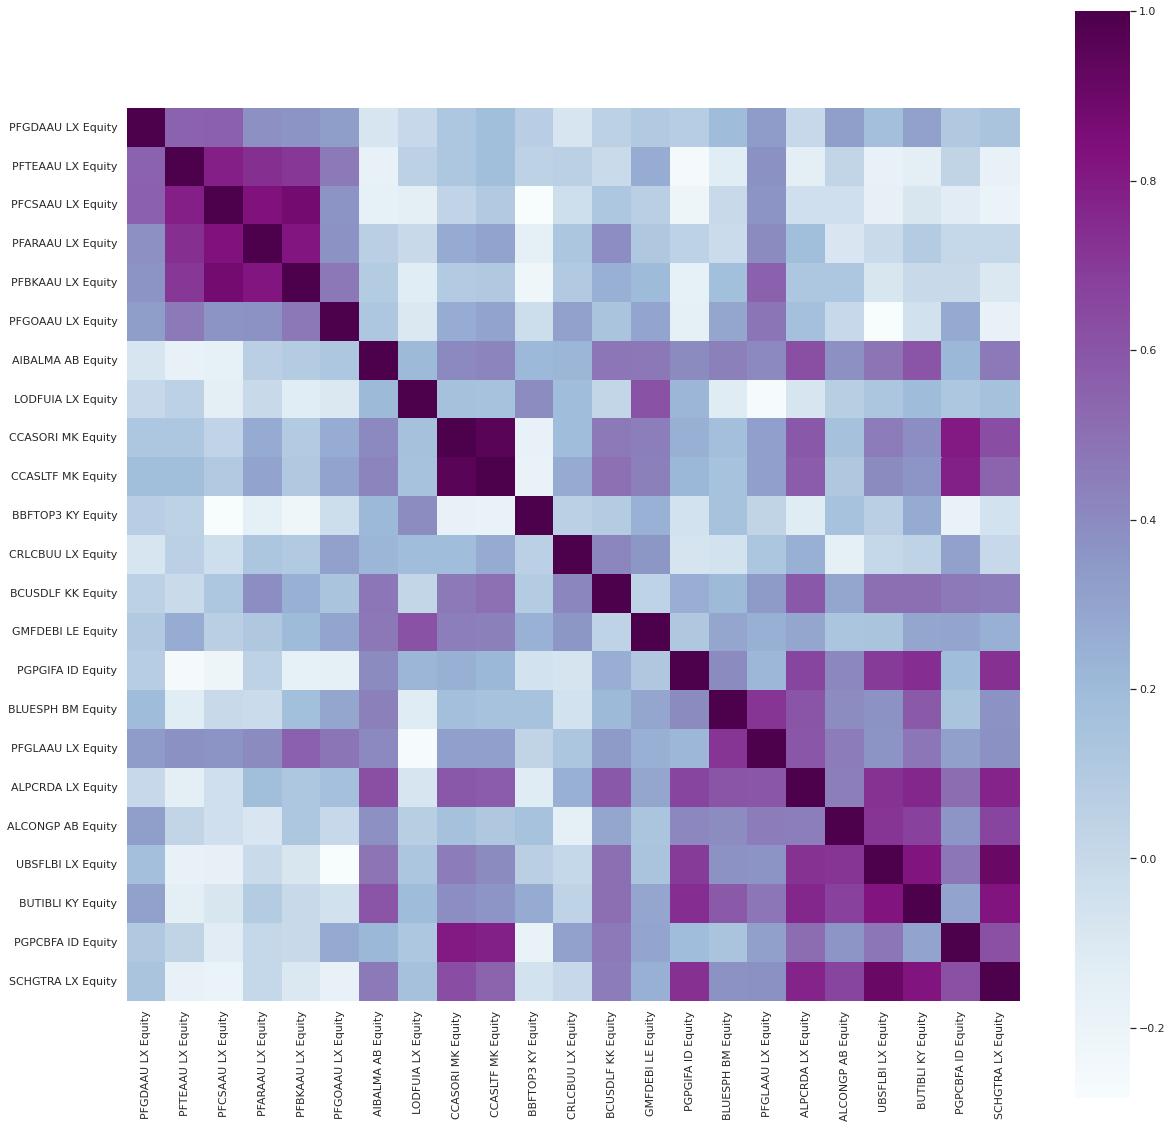

In [17]:
# Ploting a simple heat map

sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corrReturns, cmap="BuPu", square=True)

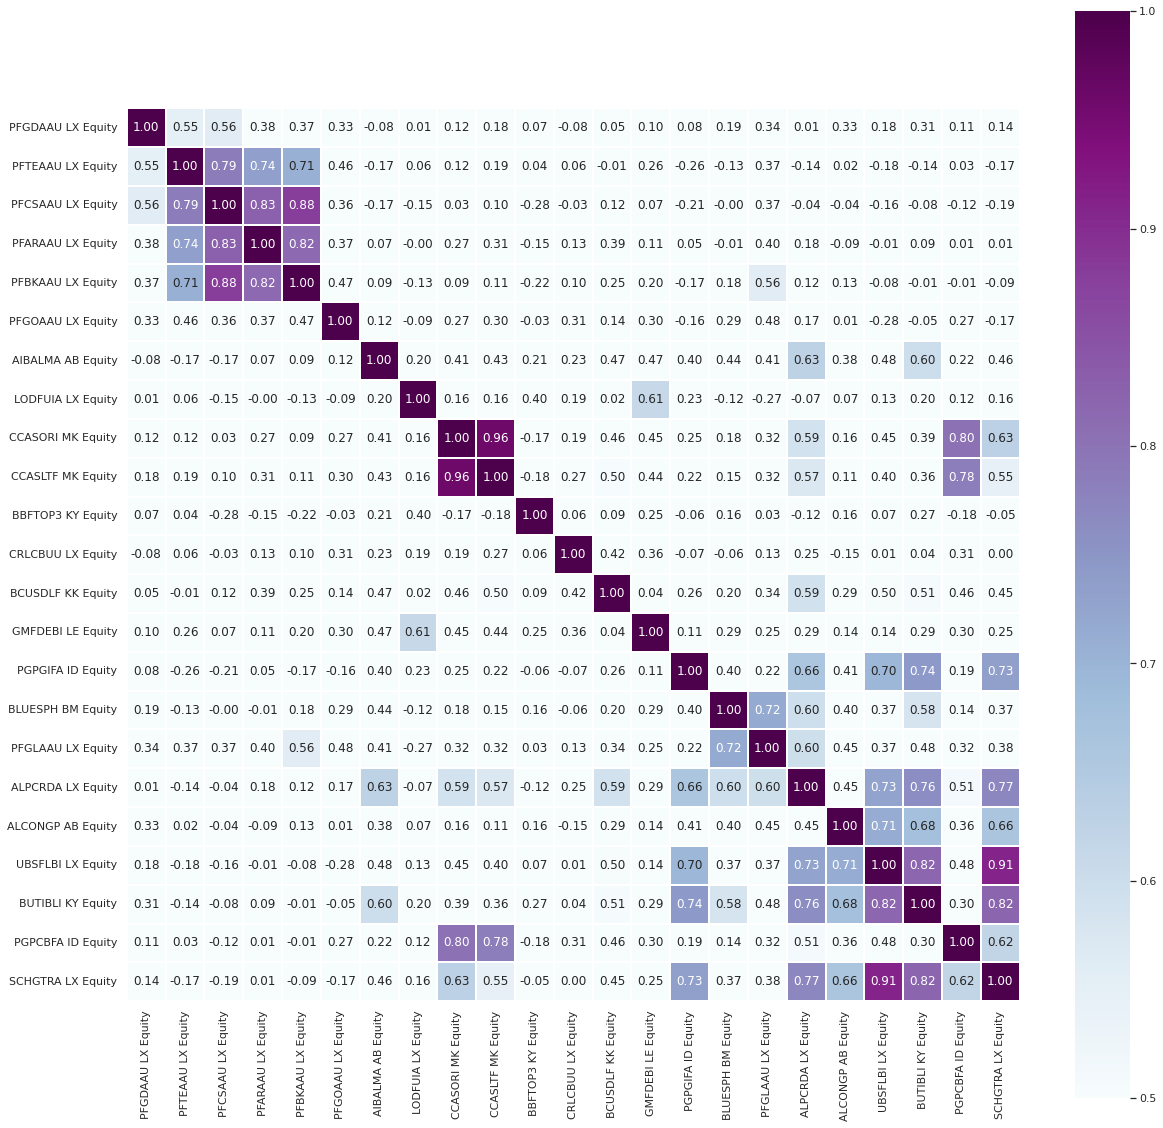

In [18]:
# Plotinng detailed heatmap

sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corrReturns, cmap="BuPu", vmin=0.5, vmax=1, annot=True, fmt='.2f', linewidth=1, square=True)      # Anything that has a correlation of 50% or above will be colored or highlighted

In [19]:
# Function to find and list all the assets that have a correlation of a specified threshold or higher

def findCorr(dataSet, threshold):
    colCorr= set()
    corrMatrix= dataSet.corr()
    for i in range(len(corrMatrix.index)):
        for j in range(i):
            if abs(corrMatrix.iloc[i,j]) < threshold:
                colname = corrMatrix.columns[i]
                colCorr.add(colname)
    return colCorr

In [20]:
# Running the corelating detectating function

corrAsset = findCorr(returns, 0.5)
len(set(corrAsset))
corrAsset

{'AIBALMA AB Equity',
 'ALCONGP AB Equity',
 'ALPCRDA LX Equity',
 'BBFTOP3 KY Equity',
 'BCUSDLF KK Equity',
 'BLUESPH BM Equity',
 'BUTIBLI KY Equity',
 'CCASLTF MK Equity',
 'CCASORI MK Equity',
 'CRLCBUU LX Equity',
 'GMFDEBI LE Equity',
 'LODFUIA LX Equity',
 'PFARAAU LX Equity',
 'PFBKAAU LX Equity',
 'PFGLAAU LX Equity',
 'PFGOAAU LX Equity',
 'PGPCBFA ID Equity',
 'PGPGIFA ID Equity',
 'SCHGTRA LX Equity',
 'UBSFLBI LX Equity'}

## Computing the Optimal portfolio

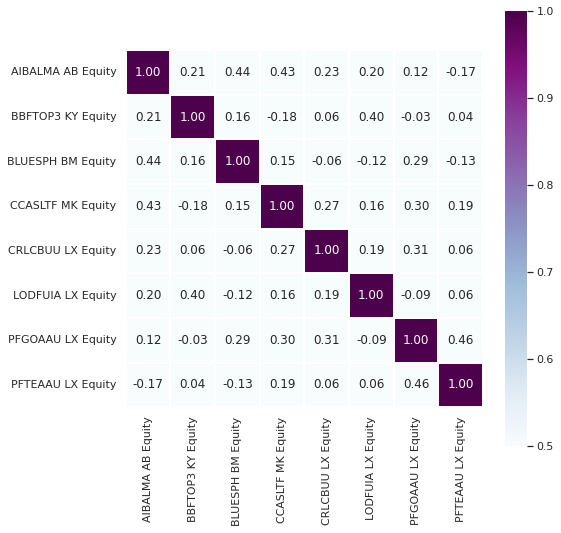

In [21]:
# List of our portfolio after removing corelated assets
myList= ['AIBALMA AB Equity',
 'BBFTOP3 KY Equity',
 'BLUESPH BM Equity',
 'CCASLTF MK Equity',
 'CRLCBUU LX Equity',
 'LODFUIA LX Equity',
 'PFGOAAU LX Equity',
 'PFTEAAU LX Equity',
 ]

 #  'BUTIBLI KY Equity', 'GMFDEBI LE Equity',

polishedData = data[myList]
returns= polishedData.pct_change().apply(lambda x: np.log(1+x))

meanReturns = returns.mean()*td

stdvReturns = returns.std()*(td)**(0.5)

rfr=0.0148    #risk free rate as 1.48% from bloomberg

sharpeReturns = (meanReturns-rfr)/stdvReturns

corrReturns = returns.corr()

covReturns = returns.cov()

# Plotinng detailed heatmap

sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrReturns, cmap="BuPu", vmin=0.5, vmax=1, annot=True, fmt='.2f', linewidth=1, square=True)      # Anything that has a correlation of 50% or above will be colored or highlighted

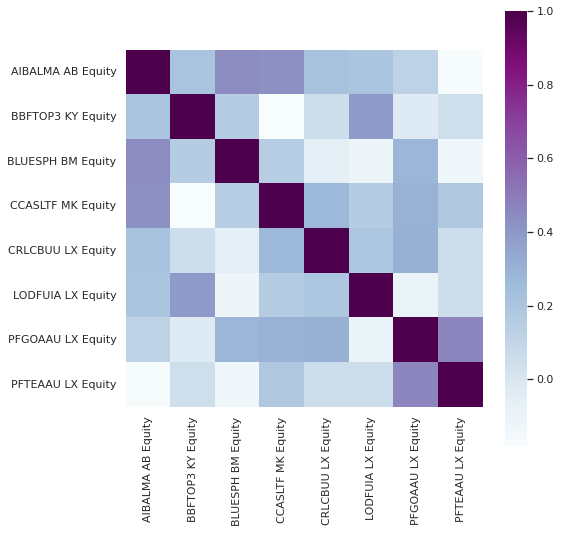

In [22]:
# Plotinng detailed heatmap of corelation

sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrReturns, cmap="BuPu", square=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


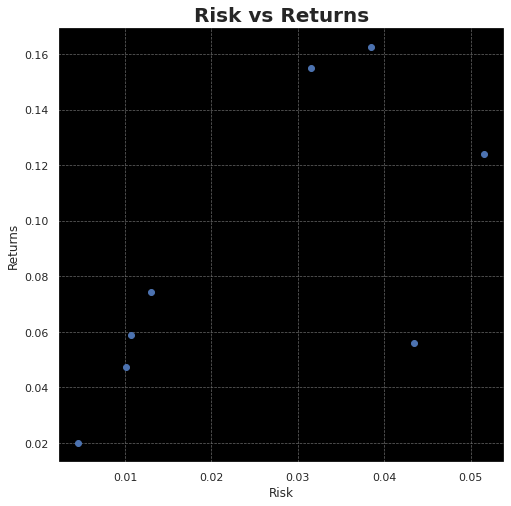

In [23]:
# plotting the scatter graph of risk agains returns of our portfolio

x = stdvReturns
y = meanReturns

plt.scatter(x,y)

# Formating graph
ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# labeling graph
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Risk vs Returns', fontsize= 20, fontweight='bold')
plt.show()

In [24]:
pRet=[]
pVol=[]
pSha=[]
pWeights=[]

numAssets = len(polishedData.columns)
numPortfolios = 1000000

In [25]:
for portfolio in range (numPortfolios):
    weights = np.random.random(numAssets)
    weights = weights/np.sum(weights)
    pWeights.append(weights)
    returns = np.dot(weights, meanReturns)
    
    pRet.append(returns)
    var = covReturns.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    stdvReturns = sd*np.sqrt(td)
    pVol.append(stdvReturns)
    sharpe = (returns-rfr)/stdvReturns
    pSha.append(sharpe)
    

In [26]:
dataData = {'Returns':pRet, 'Volatility':pVol, 'Sharpe':pSha}

for counter, symbol in enumerate(polishedData.columns.tolist()): #Add cleaner versions.
    
    dataData[symbol+'weight']=[w[counter] for w in pWeights]
portfolios = pd.DataFrame(dataData)
portfolios.head()

,Returns,Volatility,Sharpe,AIBALMA AB Equityweight,BBFTOP3 KY Equityweight,BLUESPH BM Equityweight,CCASLTF MK Equityweight,CRLCBUU LX Equityweight,LODFUIA LX Equityweight,PFGOAAU LX Equityweight,PFTEAAU LX Equityweight
0,0.077735,0.014305,4.399413,0.059208,0.042885,0.125699,0.253400,0.150320,0.147167,0.148112,0.073209
1,0.088891,0.016913,4.380626,0.196179,0.065089,0.221838,0.133388,0.128172,0.095978,0.057246,0.102110
2,0.075058,0.011798,5.107579,0.079175,0.132579,0.158583,0.188483,0.116498,0.169614,0.044911,0.110156
3,0.090703,0.018679,4.063508,0.029061,0.157923,0.193375,0.200338,0.054822,0.012756,0.204973,0.146752
4,0.089597,0.017384,4.302558,0.334597,0.003966,0.086949,0.127289,0.072815,0.284155,0.078821,0.011409


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Risk vs Returns')

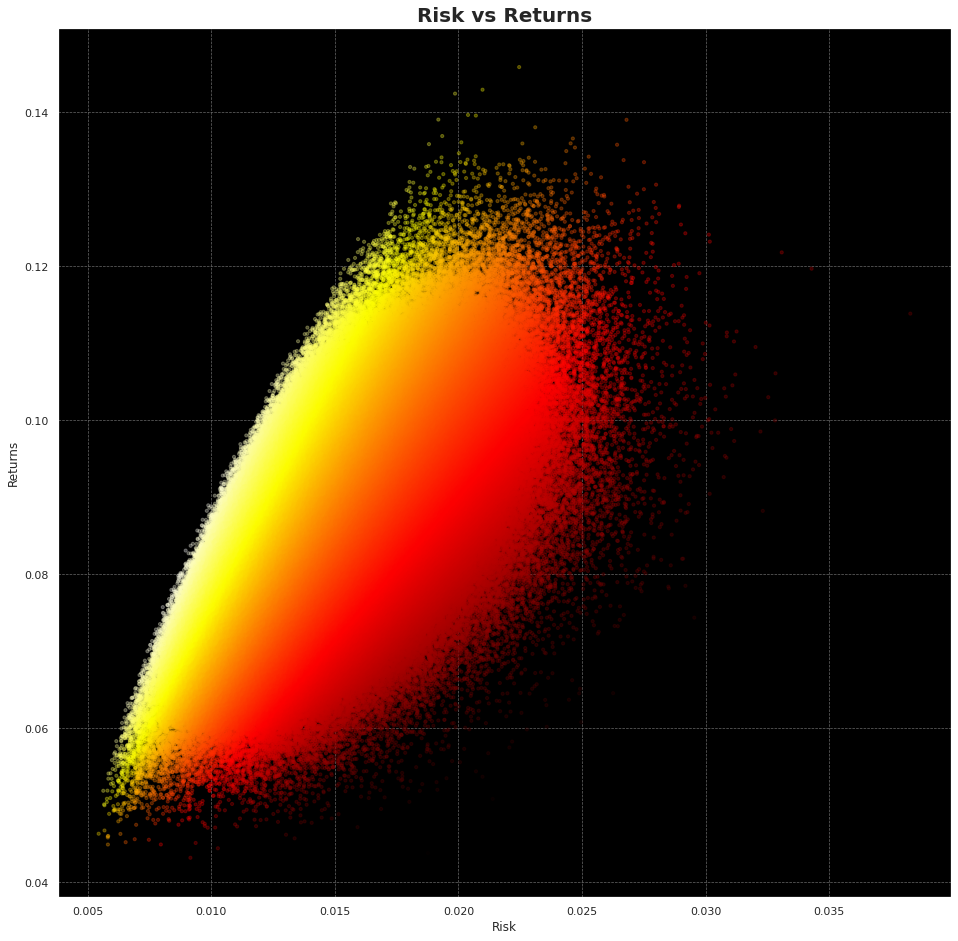

In [27]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', c=pSha, cmap='hot', s=10, alpha=0.3, grid=True, figsize=[16,16])

#Formating Graph
ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# Labeling Graph
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Risk vs Returns', fontsize= 20, fontweight='bold')

In [28]:
w= 0.125
bmpReturns = np.mean(w*meanReturns)
bmpVolatility = np.mean(w*stdvReturns)
bmpSharpe = (bmpReturns-rfr)/bmpVolatility
print('\nReturns: ', bmpReturns, '\nVolatility:', bmpVolatility, '\nSharpe:', bmpSharpe)


Returns:  0.010901441489607384 
Volatility: 0.0014953233320260406 
Sharpe: -2.6071675783393213


In [29]:
minVolPortfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]
minVolPortfolio

Returns                    0.046321
Volatility                 0.005446
Sharpe                     5.787612
AIBALMA AB Equityweight    0.001738
BBFTOP3 KY Equityweight    0.284119
BLUESPH BM Equityweight    0.029329
CCASLTF MK Equityweight    0.140696
CRLCBUU LX Equityweight    0.127001
LODFUIA LX Equityweight    0.392293
PFGOAAU LX Equityweight    0.016688
PFTEAAU LX Equityweight    0.008135
Name: 780701, dtype: float64

In [30]:
optRiskPortfolio = portfolios.iloc[portfolios['Sharpe'].idxmax()]
optRiskPortfolio

Returns                    0.083085
Volatility                 0.008965
Sharpe                     7.616564
AIBALMA AB Equityweight    0.080357
BBFTOP3 KY Equityweight    0.284056
BLUESPH BM Equityweight    0.009416
CCASLTF MK Equityweight    0.271276
CRLCBUU LX Equityweight    0.200264
LODFUIA LX Equityweight    0.004459
PFGOAAU LX Equityweight    0.004909
PFTEAAU LX Equityweight    0.145262
Name: 393891, dtype: float64

Text(0.5, 1.0, 'Risk vs Returns')

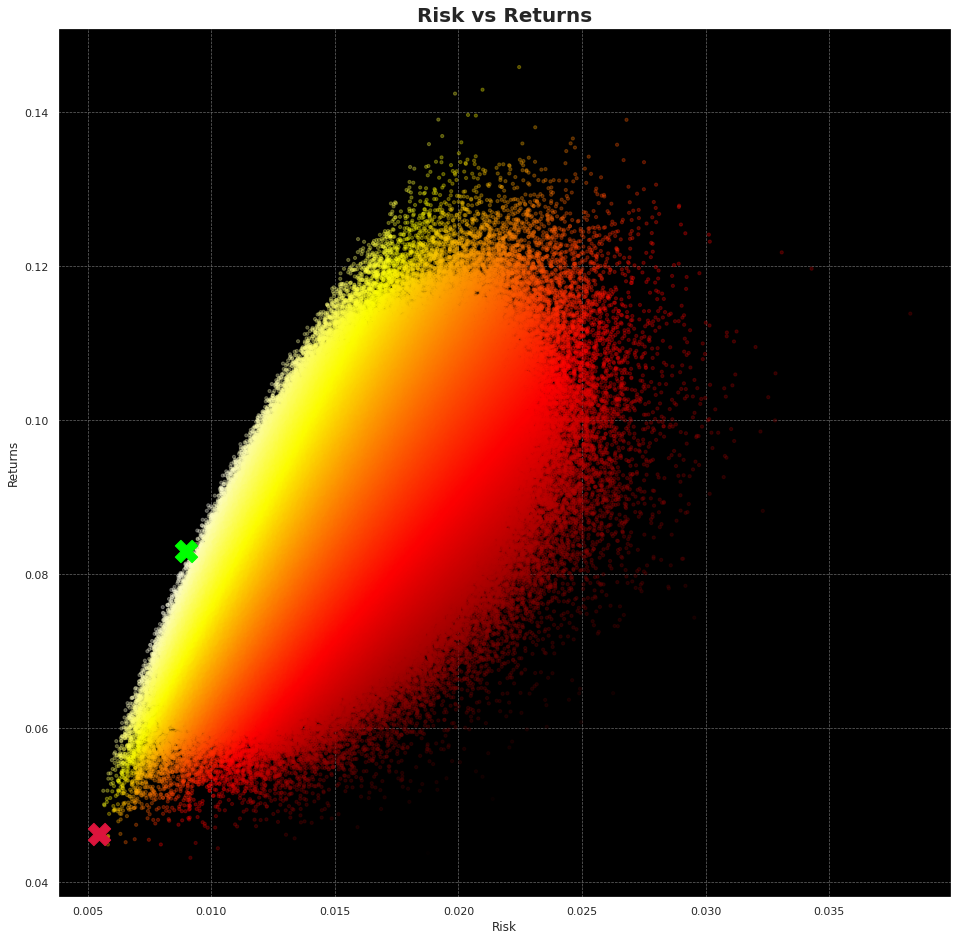

In [31]:
plt.subplots(figsize=(16,16))

ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# Formating Graphs
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', c=pSha, cmap='hot', s=10, alpha=0.3)
plt.scatter(minVolPortfolio[1], minVolPortfolio[0], color='crimson', marker='X', s=500)
plt.scatter(optRiskPortfolio[1], optRiskPortfolio[0], color='lime', marker='X', s=500)

# Labeling graph
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Risk vs Returns', fontsize= 20, fontweight='bold')